In [194]:
# import libraries:
import numpy as np
import pandas as pd

In [195]:
# define sigmoid function: 
def sigmoid(z):
    # Compute sigmoid function
    # J = sigmoid(z) computes the sigmoid of z.
    
    return 1./(1.+np.exp(-z))

def h(theta, x):
    return sigmoid(np.dot(x, theta))

def derivative(theta, X, y): ## define 𝝏𝒉 𝝏𝜽
    return np.dot(X.T, (h(theta, X) - y)) / m

In [196]:
#cost or loss or error function:
def loss(theta, x, y):
    # J = loss(theta, X, y) computes the loss or cost of using theta as the
    # parameter for logistic regression and the gradient of the cost
    # w.r.t. to the parameters.
    
    # Initialize some useful values
    m = len(y); # number of training examples

    J = 0;
    
    term1 = np.dot(y.T, np.log(h(theta, x)))
    term2 = np.dot(1-y.T, np.log(1-h(theta, x)))
    J = -np.sum(term1 + term2) / m
    
    #J = h(theta, x)* (1-y) + m + np.log(np.exp(-m) + np.exp(-(m+np.dot(theta, x))))
    
    return J

In [197]:
# function to predict label for test points
def predict(theta, xt):    
    # Predict whether the label is 0 or 1 using learned logistic 
    # regression parameters theta
    #   p = predict(theta, t) computes the predictions for xt using a 
    #   threshold at 0.5 (i.e., if sigmoid(theta, x) >= 0.5, predict 1) else predict 0

    m = size(xt, 1); # number of training examples

    p = 0

    z = h(x_test, theta)
    p = np.array([1 if u >= 0.5 else 0 for u in z])
    
    p = np.zeros((1, m))
    for i in range(theta.shape[1]):
        if sigmoid(theta, xt) >= 0.5:
            p[0][i] = 1
    return p

In [198]:
# function gradientDescent to find the best theta
def gradientDescent(theta, x, y, alpha=0.1, iters=100):
    # return final theta and the loss history for each iteration
    # final_theta, JHistory = gradientDescent(theta, x_train, y_train)
    
    m = len(x)   # number of training examples (or points)
    J_history = [] # list to store history of J for each iteration
 
    for k in range(iters):
        theta -= alpha * derivative(theta, x, y)
        J_history.append(loss(theta, x , y))

    # the function returns the final theta and history of loss or cost function
    return theta, J_history

In [199]:
# Load data file ex1.data
data=pd.read_csv('ex2data1.txt', names=['x1', 'x2', 'y'])

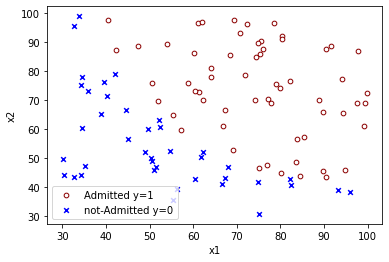

In [200]:
import matplotlib.pyplot as plt

## Extracting positive and negative examples
Admitted = data[data['y'] == 1]       # all examples with y=1 class
notAdmitted = data[data['y'] == 0]    # all examples with y=0 class
################################################

## Drawing postive and negativs exampels
plt.scatter(Admitted['x1'], Admitted['x2'], s=22, label='Admitted y=1', marker='o', color='white', edgecolor='darkred')
plt.scatter(notAdmitted['x1'], notAdmitted['x2'], s=22, label='not-Admitted y=0', marker='x', color='blue')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [201]:
# Extracting feature vector x and outplut label y

y = data.values[:, -1]
x = data.values[:, :-1]

In [202]:
# Normalize feature vector using the mean-standard deviation

MuX = x.mean(axis=0)
StdX = x.std(axis=0)

x = (x - MuX) / StdX

In [203]:
# Append column of ones to the feature vector
n = x.shape[0]
x1 = np.append(np.ones((n, 1)), x, axis=1)

In [204]:
# Split data into x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, random_state=0, test_size=0.2)

In [205]:
## initialize variables for gradient descent to learn the theta values
m, n = x_train.shape       # m is the number of examples and n is the number of features
theta = np.zeros(n)  # initialize theta to be a vector of zeros

# initialize you alpha and the number of iterations you want
alpha = 1.5
iters = 100

In [206]:
## Calling Gradient Descent Algorithm

theta, J_history= gradientDescent(theta, x_train, y_train, alpha, iters)

print(theta.shape)

print('Theta = ', theta)
print("loss function = ", J_history[-1])

(3,)
Theta =  [1.0959236  3.27506949 3.2699032 ]
loss function =  0.19766770452898433


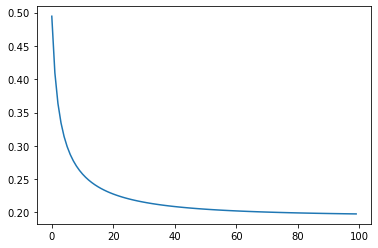

In [207]:
# Drawing the loss or cost function J_history
plt.plot(J_history)
plt.show()

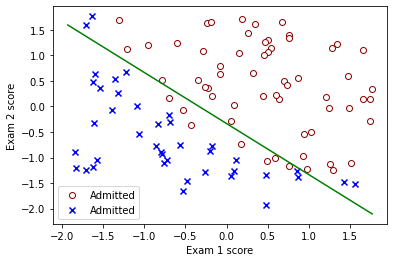

In [208]:
## Draw Decision Boundary, only works for two features data n=3
a = (Admitted.values[:,0:2] - MuX) / StdX
b = (notAdmitted.values[:,0:2] - MuX) / StdX
#a = Admitted
#b = notAdmitted
plt.scatter(a[:, 0], a[:, 1], marker = 'o', label="Admitted", color='white', edgecolor='darkred')
plt.scatter(b[:, 0], b[:, 1], marker = 'x', label="Admitted", color='blue')
x_value1 = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
d = -(theta[0] + theta[1] * x_value1) / theta[2]
#d = -(-25.164593 + 0.206261 * x_value) / 0.201499
plt.plot(x_value1, d, color="g")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc=0)
plt.show()

In [209]:
# Use sklearn Logistic Regression for (x_train, y_train)

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='liblinear')
lg.fit(x_train, y_train)

print("train score: ", lg.score(x_train, y_train))
print("test score: ", lg.score(x_test, y_test))

train score:  0.9125
test score:  0.8


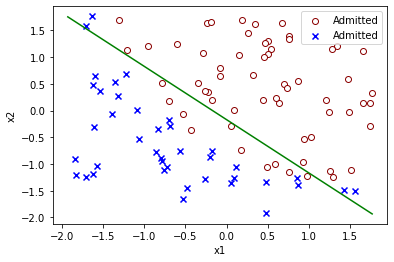

In [210]:
## Draw Decision Boundary, only works for two features data n=3
a = (Admitted.values[:,0:2] - MuX) / StdX
b = (notAdmitted.values[:,0:2] - MuX) / StdX

plt.scatter(a[:, 0], a[:, 1], marker = 'o', label="Admitted", color='white', edgecolor='darkred')
plt.scatter(b[:, 0], b[:, 1], marker = 'x', label="Admitted", color='blue')
x_value1 = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
d = -(lg.intercept_ + lg.coef_[0][1] * x_value1) / lg.coef_[0][2]
plt.plot(x_value1, d, color="g")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()